# Datasource Preparation

## Extrat Turo date from json file and normalize the dictonaries to dataframe

In [ ]:
import json 
import pandas as pd 
from pandas.io.json import json_normalize 
df = pd.read_json('/content/drive/Shareddrives/ML&DD/final project/database.json')
df.head()
owner_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['owner']],ignore_index=True)
owner_df.head()
rate_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['rate']],ignore_index=True)
rate_df.head()
### distanceWithUnit
distanceWithUnit_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['distanceWithUnit']],ignore_index=True)
distanceWithUnit_df.head()
### location
location_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['location']],ignore_index=True)
location_df.head()
### vehicle
vehicle_df = pd.concat([pd.DataFrame(json_normalize(x)) for x in df['vehicle']],ignore_index=True)
vehicle_df.head()
### Combine the data
dff=df[['rating','renterTripsTaken','reviewCount','responseRate','newListing','freeDeliveryPromotion','instantBookDisplayed','deliveryLabel']]
rate_dff=rate_df['averageDailyPrice']
distance_dff=distanceWithUnit_df['scalar']
location_dff=location_df[['city','longitude','latitude','state']]
vehicle_dff=vehicle_df[['model','make','id','listingCreatedTime','year','type','automaticTransmission']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


In [ ]:
pdList = [dff, rate_dff,distance_dff,location_dff,vehicle_dff]  # List of your dataframes
new_df = pd.concat(pdList,axis=1)
new_df.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,longitude,latitude,state,model,make,id,listingCreatedTime,year,type,automaticTransmission
0,NaN,0,0,0.0,False,False,False,None,29.0,11,...,-93.265547,42.522726,IA,Fusion,Ford,58905,1406583813000,2014,car,True
1,5.00,1,1,100.0,False,False,True,None,162.0,8,...,-95.789869,44.433663,MN,718 Boxster,Porsche,403202,1523137713000,2017,car,True
2,NaN,0,0,NaN,False,False,True,None,40.0,5,...,-80.559747,40.351722,WV,Cruze,Chevrolet,320436,1505356047000,2014,car,True
3,3.75,4,5,100.0,False,False,True,None,99.0,19,...,-80.222071,40.518838,PA,6 Series,BMW,350460,1512018225000,2006,car,True
4,NaN,0,0,NaN,False,False,False,None,81.0,17,...,-80.241361,40.495285,PA,Explorer,Ford,429146,1527170872000,2017,suv,True


In [ ]:
new_df['listingCreatedTime'] = pd.to_datetime(new_df['listingCreatedTime'],unit='ms')
new_df.id.drop_duplicates()
len(new_df.id.drop_duplicates()) 
new_df.to_csv('car rental turo.csv')

## combine turo data with population data and brand level

In [ ]:
pop=pd.read_csv('/content/drive/Shareddrives/ML&DD/final project/population data.csv')
pop.head()
new_df= pd.read_csv('/content/drive/Shareddrives/ML&DD/final project/car rental turo.csv')
level_df=pd.read_csv('/content/drive/Shareddrives/ML&DD/final project/Brand Level.csv')

In [ ]:
new_df['state'].unique()

array(['Iowa', 'Minnesota', 'West Virginia', 'Pennsylvania', 'Maine',
       'North Carolina', 'Michigan', 'Georgia', 'Washington', 'Oklahoma',
       'Hawaii', 'Indiana', 'Kansas', 'Arkansas', 'California',
       'Wisconsin', 'Missouri', 'Alabama', 'Arizona', 'Vermont',
       'Mississippi', 'Massachusetts', 'Montana', 'New Hampshire', 'Ohio',
       'North Dakota', 'Illinois', 'New Mexico', 'Florida', 'Wyoming',
       'Idaho', 'Virginia', 'Texas', 'Tennessee', 'Kentucky',
       'New Jersey', 'South Dakota', 'South Carolina', 'Louisiana',
       'Colorado', 'Connecticut', 'Utah', 'Rhode Island', 'Maryland',
       'Nebraska', 'Oregon', 'Delaware', 'Nevada', 'Alaska'], dtype=object)

In [ ]:
df0=new_df.copy()
df0.replace({'state' : {             'WA' : 'Washington', 'NM' : 'New Mexico', 'GA' : 'Georgia',
                                    'FL' :  'Florida' , 'TX' : 'Texas' , 'NC' : 'North Carolina',
                                    'SC' : 'South Carolina', 'CT' : 'Connecticut', 'MA' : 'Massachusetts',
                                    'ME' : 'Maine', 'AL' : 'Alabama', 'MT' : 'Montana',
                                    'TN' : 'Tennessee', 'KY' : 'Kentucky', 'ID' : 'Idaho' ,
                                    'UT' : 'Utah', 'MD' : 'Maryland', 'DC' : 'Washington' ,
                                    'IA' : 'Iowa', 'OH' : 'Ohio', 'CO' : 'Colorado' ,
                                    'VA' : 'Virginia', 'MI' : 'Michigan', 'NJ' : 'New Jersey' ,
                                    'IN' : 'Indiana', 'WI' : 'Wisconsin', 'KS' : 'Kansas' ,
                                    'MO' : 'Missouri', 'NV' : 'Nevada', 'CA' : 'California' ,
                                    'LA' : 'Louisiana', 'AR' : 'Arkansas', 'IL' : 'Illinois' ,
                                    'MS' : 'Mississippi', 'NH' : 'New Hampshire', 'MN' : 'Minnesota' ,
                                    'OK' : 'Oklahoma', 'NE' : 'Nebraska', 'OR' : 'Oregon' ,
                                    'PA' : 'Pennsylvania', 'DE' : 'Delaware', 'AZ' : 'Arizona' ,
                                    'WV' : 'West Virginia', 'RI' : 'Rhode Island', 'AK' : 'Alaska',
                                    'HI' : 'Hawaii', 'VT' : 'Vermont','ND' : 'North Dakota', 'WY' : 'Wyoming',
                                    'SD' : 'South Dakota'}},
              inplace=True)
df0 = pd.merge(df0, pop, how="left", on="state")
df0['listingyear']=pd.DatetimeIndex(df0['listingCreatedTime']).year

import numpy as np
lst = []
def createList(n):

    for i in range(n,n+20):
        lst.append(i)
    return lst
yearlist=createList(2000)
df0['population'] =0
for i in range(len(yearlist)):
    df0['population'] = (np.where(df0['listingyear'] == yearlist[i], df0[str(yearlist[i])] ,df0['population']  ))
    
df0=df0.drop(['2000', '2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'], axis=1)

In [ ]:
### Combine turo data with brand level information 
df0.merge(level_df, how='left', on='make')

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,model,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,population,Level
0,NaN,0,0,0.0,False,False,False,NaN,29,11,...,Fusion,Ford,58905,7/28/2014 21:43,2014,car,True,2014,3109350,Economy
1,5.0000,1,1,100.0,False,False,True,NaN,162,8,...,718 Boxster,Porsche,403202,4/7/2018 21:48,2017,car,True,2018,5606249,Economy
2,NaN,0,0,NaN,False,False,True,NaN,40,5,...,Cruze,Chevrolet,320436,9/14/2017 2:27,2014,car,True,2017,1817004,Economy
3,3.7500,4,5,100.0,False,False,True,NaN,99,19,...,6 Series,BMW,350460,11/30/2017 5:03,2006,car,True,2017,12787641,Economy
4,NaN,0,0,NaN,False,False,False,NaN,81,17,...,Explorer,Ford,429146,5/24/2018 14:07,2017,suv,True,2018,12800922,Economy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,NaN,0,0,NaN,False,False,True,NaN,84,13,...,Escalade,Cadillac,247785,3/4/2017 17:07,2007,suv,True,2017,7423362,Luxury
36275,NaN,0,0,NaN,True,False,True,NaN,126,14,...,Q7,Audi,448257,6/24/2018 16:39,2007,suv,True,2018,7523869,Luxury
36276,3.6667,4,5,88.0,False,False,True,NaN,47,18,...,Sierra 1500,GMC,375659,2/5/2018 4:36,2007,truck,True,2018,7523869,Good
36277,NaN,0,0,NaN,False,False,True,NaN,170,20,...,BRZ,Subaru,430211,5/26/2018 13:50,2017,car,True,2018,39461588,Good


In [ ]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd 

In [ ]:
# Connect to your google drive to access the data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data into pandas dataframe
Turo = pd.read_csv('/content/drive/Shareddrives/ML&DD/final project/car rental turo data.csv')
level =  pd.read_csv('/content/drive/Shareddrives/ML&DD/final project/Brand Level.csv')

# Data Cleaning

### Take a brief look at the data

In [ ]:
Turo.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,state,model,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,population
0,NaN,0,0,0.0,False,False,False,NaN,29,11,...,Iowa,Fusion,Ford,58905,7/28/2014 21:43,2014,car,True,2014,3109350
1,5.00,1,1,100.0,False,False,True,NaN,162,8,...,Minnesota,718 Boxster,Porsche,403202,4/7/2018 21:48,2017,car,True,2018,5606249
2,NaN,0,0,NaN,False,False,True,NaN,40,5,...,West Virginia,Cruze,Chevrolet,320436,9/14/2017 2:27,2014,car,True,2017,1817004
3,3.75,4,5,100.0,False,False,True,NaN,99,19,...,Pennsylvania,6 Series,BMW,350460,11/30/2017 5:03,2006,car,True,2017,12787641
4,NaN,0,0,NaN,False,False,False,NaN,81,17,...,Pennsylvania,Explorer,Ford,429146,5/24/2018 14:07,2017,suv,True,2018,12800922


In [ ]:
Turo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rating                 21060 non-null  float64
 1   renterTripsTaken       36279 non-null  int64  
 2   reviewCount            36279 non-null  int64  
 3   responseRate           27845 non-null  float64
 4   newListing             36279 non-null  bool   
 5   freeDeliveryPromotion  36279 non-null  bool   
 6   instantBookDisplayed   36279 non-null  bool   
 7   deliveryLabel          9038 non-null   object 
 8   averageDailyPrice      36279 non-null  int64  
 9   scalar                 36279 non-null  int64  
 10  city                   36279 non-null  object 
 11  longitude              36279 non-null  float64
 12  latitude               36279 non-null  float64
 13  state                  36279 non-null  object 
 14  model                  36279 non-null  object 
 15  ma

### Extract year, month and date from timestamp column

In [ ]:
# Create the column listingyear: year of the listing created
Turo['listingyear'] = pd.DatetimeIndex(Turo['listingCreatedTime']).year
Turo['listingyear'].head()

0    2014
1    2018
2    2017
3    2017
4    2018
Name: listingyear, dtype: int64

In [ ]:
Turo['listingyear'].value_counts()

2018    18312
2017    12330
2016     4556
2015      791
2014      218
2013       54
2012       18
Name: listingyear, dtype: int64

In [ ]:
# Create the column listingmonth: month of the listing created
Turo['listingmonth'] = pd.DatetimeIndex(Turo['listingCreatedTime']).month
Turo['listingmonth'].head()

0     7
1     4
2     9
3    11
4     5
Name: listingmonth, dtype: int64

In [ ]:
# Create the column listingCreatedDate: date of the listing created
Turo["listingCreatedDate"] = pd.to_datetime(Turo["listingCreatedTime"]).dt.date
Turo['listingCreatedDate'].head()

0    2014-07-28
1    2018-04-07
2    2017-09-14
3    2017-11-30
4    2018-05-24
Name: listingCreatedDate, dtype: object

### Impute Missing Values

In [ ]:
# Check whether there is missing values
print(Turo.isnull().sum())
# There are missing values in rating, responseRate, and deliveryLabel

rating                   15219
renterTripsTaken             0
reviewCount                  0
responseRate              8434
newListing                   0
freeDeliveryPromotion        0
instantBookDisplayed         0
deliveryLabel            27241
averageDailyPrice            0
scalar                       0
city                         0
longitude                    0
latitude                     0
state                        0
model                        0
make                         0
id                           0
listingCreatedTime           0
year                         0
type                         0
automaticTransmission        0
listingyear                  0
population                   0
listingmonth                 0
listingCreatedDate           0
dtype: int64


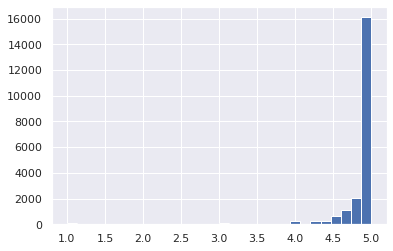

In [ ]:
plt.hist(Turo['rating'],bins=30)
plt.show() 
# Most listings get ratings around 4.5 - 5.0. We can assume the missing ratings
# are similar to the mean rating

In [ ]:
# impute missing values in rating with mean
Turo['rating'].fillna((Turo['rating'].mean()), inplace=True)

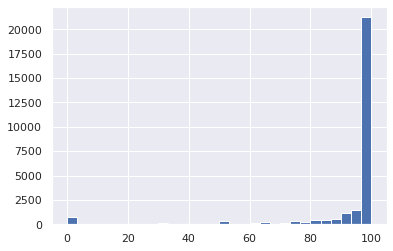

In [ ]:
# There is 0 in reponse rate. We can assume the missing value is 0. 
plt.hist(Turo['responseRate'],bins=30)
plt.show() 

In [ ]:
# Impute missing response rate with 0
Turo['responseRate'] = Turo['responseRate'].fillna(0)

In [ ]:
Turo['deliveryLabel'].value_counts()
# This column has either "FREE DELIVERY" or "None". We can drop this 
# column because it is not meaningful

FREE DELIVERY    9038
Name: deliveryLabel, dtype: int64

# EDA

### renterTripsTaken (representing the demand)

In [ ]:
Turo['renterTripsTaken'].describe()
# Min is 0. Max is 450, which may be an outlier.  

count    36279.000000
mean        11.040823
std         22.486039
min          0.000000
25%          0.000000
50%          2.000000
75%         11.000000
max        450.000000
Name: renterTripsTaken, dtype: float64

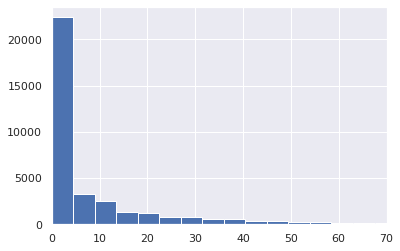

In [ ]:
plt.hist(Turo['renterTripsTaken'],bins=100)
plt.xlim(0,70)
plt.show() 

## averageDailyPrice

In [ ]:
Turo['averageDailyPrice'].describe()

count    36279.000000
mean        98.566471
std        112.602460
min         10.000000
25%         39.000000
50%         64.000000
75%        110.000000
max       1999.000000
Name: averageDailyPrice, dtype: float64

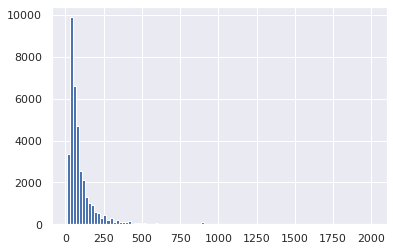

In [ ]:
plt.hist(Turo['averageDailyPrice'],bins=100)
plt.show() 
# left skewed, with an outlier = 1999 

In [ ]:
Turo[Turo["listingyear"] == 2017]

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,deliveryLabel,averageDailyPrice,scalar,...,make,id,listingCreatedTime,year,type,automaticTransmission,listingyear,population,listingmonth,listingCreatedDate
2,4.873181,0,0,0.0,False,False,True,NaN,40,5,...,Chevrolet,320436,9/14/2017 2:27,2014,car,True,2017,1817004,9,2017-09-14
3,3.750000,4,5,100.0,False,False,True,NaN,99,19,...,BMW,350460,11/30/2017 5:03,2006,car,True,2017,12787641,11,2017-11-30
10,5.000000,13,13,100.0,False,True,True,FREE DELIVERY,252,3,...,Tesla,360830,12/29/2017 17:16,2017,car,True,2017,9973114,12,2017-12-29
11,5.000000,5,4,100.0,False,False,True,NaN,84,7,...,Ford,278040,6/8/2017 13:45,2007,car,True,2017,9973114,6,2017-06-08
15,4.888900,38,28,100.0,False,False,True,NaN,119,14,...,GMC,281422,6/16/2017 15:23,2016,suv,True,2017,9973114,6,2017-06-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36269,5.000000,7,5,100.0,False,True,True,NaN,60,2,...,Ford,307985,8/15/2017 21:40,2014,truck,True,2017,7423362,8,2017-08-15
36271,5.000000,13,12,90.0,False,False,True,FREE DELIVERY,50,3,...,Honda,206336,3/24/2017 0:09,2012,car,True,2017,7423362,3,2017-03-24
36272,5.000000,7,5,100.0,False,True,True,NaN,38,14,...,Jeep,357430,12/19/2017 22:31,2012,suv,True,2017,7423362,12,2017-12-19
36273,5.000000,4,2,100.0,False,False,False,NaN,53,14,...,Ford,274882,5/31/2017 22:14,2013,truck,True,2017,7423362,5,2017-05-31


## Demand v.s. Price

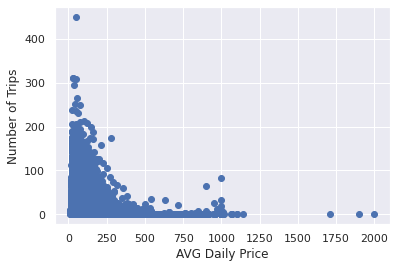

In [ ]:
plt.scatter(Turo['averageDailyPrice'], Turo['renterTripsTaken'])
plt.xlabel("AVG Daily Price")
plt.ylabel("Number of Trips")
plt.show() 
# There seems to be a curve pattern in the plot. 
# The higher the price,the lower the number of trips. 
# Therefore, using renterTripsTaken to represent demand makes sense. 

# Demand over time



#### Overall trend


In [ ]:
demand_over_time = Turo[["renterTripsTaken","listingCreatedDate"]].groupby(by=["listingCreatedDate"]).sum()

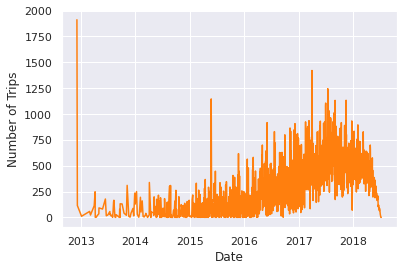

In [ ]:
plt.plot(demand_over_time.index, demand_over_time["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.show()
# 2012 has an extremely high trip demand. The demand increases until mid-2017 and then goes down.  

### Seasonal trend by year

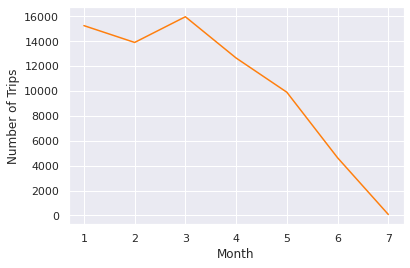

In [ ]:
# Demand in 2018
demand_18 = Turo[Turo["listingyear"] == 2018]
demand_18 = demand_18[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_18.index, demand_18["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

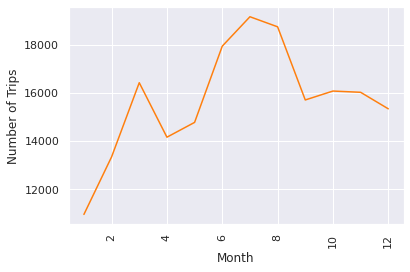

In [ ]:
# Demand in 2017
demand_17 = Turo[Turo["listingyear"] == 2017]
demand_17 = demand_17[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_17 .index, demand_17["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

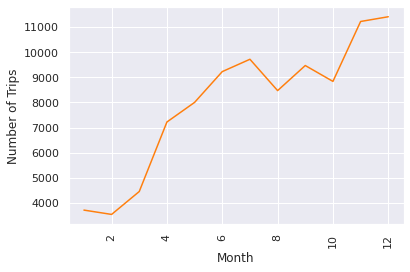

In [ ]:
# Demand in 2016
demand_16 = Turo[Turo["listingyear"] == 2016]
demand_16 = demand_16[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_16 .index, demand_16["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

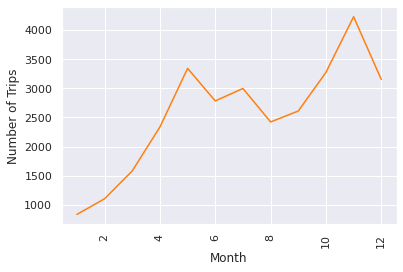

In [ ]:
# Demand in 2015
demand_15 = Turo[Turo["listingyear"] == 2015]
demand_15 = demand_15[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_15 .index, demand_15["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

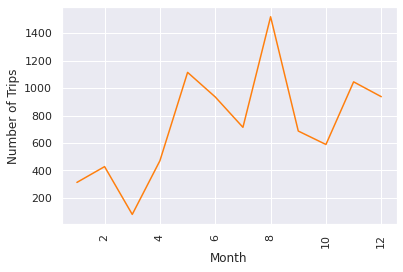

In [ ]:
# Demand in 2014
demand_14 = Turo[Turo["listingyear"] == 2014]
demand_14 = demand_14[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_14 .index, demand_14["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

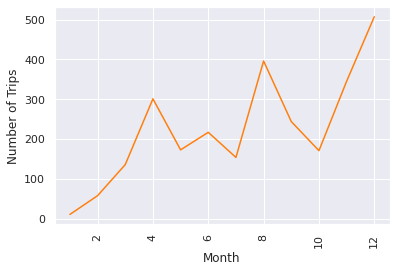

In [ ]:
# Demand in 2013
demand_13 = Turo[Turo["listingyear"] == 2013]
demand_13 = demand_13[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_13 .index, demand_13["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.xticks(rotation = 90)
plt.ylabel("Number of Trips")
plt.show()

Every year, the seasonal change in demand is different.

In [ ]:
# Demand in 2012
demand_12 = Turo[Turo["listingyear"] == 2012]
demand_12 = demand_12[["renterTripsTaken","listingCreatedTime"]].groupby(by=["listingCreatedTime"]).sum()
demand_12.head()
# There are only two records in 2012. We may need to exclude 2012 from our analysis. 

,renterTripsTaken
listingCreatedTime,
12/4/2012 19:12,1912
12/7/2012 1:40,115


### Overall seasonal trend

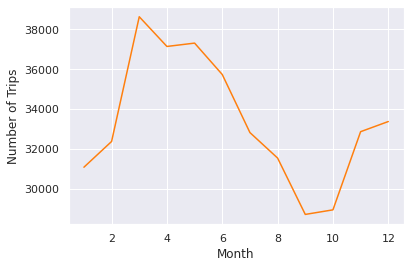

In [ ]:
demand_over_month = Turo[["renterTripsTaken","listingmonth"]].groupby(by=["listingmonth"]).sum()
plt.plot(demand_over_month.index, demand_over_month["renterTripsTaken"], color='tab:orange', label='Windspeed')
plt.xlabel("Month")
plt.ylabel("Number of Trips")
plt.show()

# Model building

### Use k-means clustering to create different car categories

In [ ]:
# Every year the demand looks different and 2017 has fairly large sample size, 
# so we focus on the 2017 data.
# Only keep the variables that are related to car itself: 
# Drop the geographical information like city, state, longitude and latitude. 
# Drop deliveryLabel because this column has only one meaningful value. 
# Drop the time variable such as listingyear, month and listingCreatedTime
# to strip the seasonality information 
# Drop renterTripsTaken, responserate, newListing, freeDeliveryPromotion, 
# instantBookDisplayed, year, population and model(600+ unique values, meaningless)

df_2017 = Turo[Turo["listingyear"] == 2017]
df_2017 = df_2017.drop(['renterTripsTaken','responseRate','newListing','freeDeliveryPromotion',
                        'instantBookDisplayed','city','state','deliveryLabel','id', 'listingCreatedTime',
                       'listingmonth', 'longitude', 'latitude',
                      'listingCreatedDate','model','population'], axis=1)
df_2017

,rating,reviewCount,averageDailyPrice,scalar,make,year,type,automaticTransmission,listingyear
2,4.873181,0,40,5,Chevrolet,2014,car,True,2017
3,3.750000,5,99,19,BMW,2006,car,True,2017
10,5.000000,13,252,3,Tesla,2017,car,True,2017
11,5.000000,4,84,7,Ford,2007,car,True,2017
15,4.888900,28,119,14,GMC,2016,suv,True,2017
...,...,...,...,...,...,...,...,...,...
36269,5.000000,5,60,2,Ford,2014,truck,True,2017
36271,5.000000,12,50,3,Honda,2012,car,True,2017
36272,5.000000,5,38,14,Jeep,2012,suv,True,2017
36273,5.000000,2,53,14,Ford,2013,truck,True,2017


In [ ]:
# Create new feature age_before_listing representing how long the car has been 
# used before listed
df_2017['age_before_listing']=df_2017['listingyear']-df_2017['year']
df_2017 = df_2017.drop(['listingyear'], axis = 1)
df_2017 = df_2017.drop(['year'], axis = 1)

In [ ]:
# create new feature brand level
df_2017=df_2017.merge(level, how='left', on='make')
df_2017.head()
df_2017

,rating,reviewCount,averageDailyPrice,scalar,make,type,automaticTransmission,age_before_listing,Level
0,4.873181,0,40,5,Chevrolet,car,True,3,Economy
1,3.750000,5,99,19,BMW,car,True,11,Economy
2,5.000000,13,252,3,Tesla,car,True,0,Good
3,5.000000,4,84,7,Ford,car,True,10,Economy
4,4.888900,28,119,14,GMC,suv,True,1,Good
...,...,...,...,...,...,...,...,...,...
12325,5.000000,5,60,2,Ford,truck,True,3,Economy
12326,5.000000,12,50,3,Honda,car,True,5,Economy
12327,5.000000,5,38,14,Jeep,suv,True,5,Economy
12328,5.000000,2,53,14,Ford,truck,True,4,Economy


In [ ]:
print(df_2017['type'].astype('category').value_counts())
# combine van and minivan since van only have 33 records
df_2017['type'] = df_2017['type'].replace(['van'],'minivan')
print(df_2017['type'].astype('category').value_counts())

car        8110
suv        3214
minivan     490
truck       483
van          33
Name: type, dtype: int64
car        8110
suv        3214
minivan     523
truck       483
Name: type, dtype: int64


In [ ]:
X = df_2017
# Encoding binomial data
X['automaticTransmission'] = (np.where(X['automaticTransmission'] == 'True', 1,0 ))

# Encoding categorical variable: type
cleanup_type = {"type":   {"car": 1, "minivan": 2, 'truck': 4, 'suv':5}}
X = X.replace(cleanup_type)

# Encoding categorical variable: level
cleanup_level = {"Level":   {"Economy": 1, "Good": 2, 'Luxury': 3}}
X = X.replace(cleanup_level)
X = X.drop('make', axis = 1)
X

,rating,reviewCount,averageDailyPrice,scalar,type,automaticTransmission,age_before_listing,Level
0,4.873181,0,40,5,1,0,3,1
1,3.750000,5,99,19,1,0,11,1
2,5.000000,13,252,3,1,0,0,2
3,5.000000,4,84,7,1,0,10,1
4,4.888900,28,119,14,5,0,1,2
...,...,...,...,...,...,...,...,...
12325,5.000000,5,60,2,4,0,3,1
12326,5.000000,12,50,3,1,0,5,1
12327,5.000000,5,38,14,5,0,5,1
12328,5.000000,2,53,14,4,0,4,1


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [ ]:
# Scale the data before fitting k-means
# In general, attribute scaling is important to be applied with K-means. 
# Most of the time, the standard Euclidean distance is used (as a distance 
# function of K-means) with the assumption that the attributes are normalized.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)


## Choose K with the elbow method

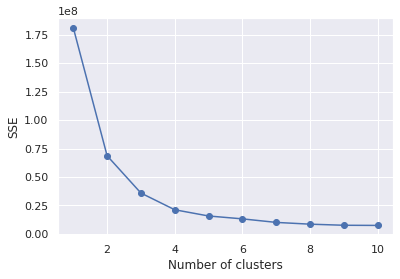

In [ ]:
# calculate SSE for a range of number of cluster
SSE_list = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    SSE_list.append(km.inertia_)

# Elbow method to choose the optimal k
plt.plot(range(1, 11), SSE_list, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()


In [ ]:
pip install kneed

In [ ]:
# Using the b   elbow method, we chose 3 as the number of clusters
from kneed import KneeLocator
kl = KneeLocator(
   range(1, 11), SSE_list, curve="convex", direction="decreasing"
   )
print(kl.elbow)

3


### Create three clusters with K-means

In [ ]:
# Fit k means with the number of clusters = 3
kmeans = KMeans(n_clusters=3)

# Label the data with 0, 1 and 2
y_kmeans = kmeans.fit_predict(scaled_features)

In [ ]:
result = pd.DataFrame(y_kmeans)
result = result.rename(columns={0: 'Predict'})
X_pred = pd.concat([X,result],axis=1)
X_pred

,rating,reviewCount,averageDailyPrice,scalar,type,automaticTransmission,age_before_listing,Level,Predict
0,4.873181,0,40,5,1,0,3,1,2
1,3.750000,5,99,19,1,0,11,1,2
2,5.000000,13,252,3,1,0,0,2,2
3,5.000000,4,84,7,1,0,10,1,2
4,4.888900,28,119,14,5,0,1,2,1
...,...,...,...,...,...,...,...,...,...
12325,5.000000,5,60,2,4,0,3,1,1
12326,5.000000,12,50,3,1,0,5,1,2
12327,5.000000,5,38,14,5,0,5,1,1
12328,5.000000,2,53,14,4,0,4,1,1


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
X_pred['Predict'].value_counts()

2    6683
1    3516
0    2131
Name: Predict, dtype: int64

In [ ]:
centers = pd.DataFrame(kmeans.cluster_centers_)
names= X.columns
centers = scaler.inverse_transform(centers)
centers = pd.DataFrame(centers)
centers.columns = names
centers

,rating,reviewCount,averageDailyPrice,scalar,type,automaticTransmission,age_before_listing,Level
0,4.866100,45.446053,52.559085,6.024288,1.380196,0.0,3.819243,1.524054
1,4.881456,8.215301,114.032423,9.228385,4.868032,0.0,3.162969,1.691695
2,4.859386,5.659523,116.100854,9.645737,1.062041,0.0,4.591788,1.679155


In [ ]:
X[['age_before_listing','Level']].groupby('Level').mean()

,age_before_listing
Level,
1,4.141647
2,4.060587
3,3.694813


## Build Regression Model to estimate the demand-price elascticity and predict the optimal price

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

### Y = number of trips X = average daliy prie + every control variables + the number of available cars in the neighbourhood + listingmonth(seasonality)

In [ ]:
### Prepare data for regression 
Regress_X=Turo.drop(['city','state','deliveryLabel','id'], axis=1)
Regress_X['Listing Difference']=Regress_X['listingyear']-Regress_X['year']

Regress_X.head()
Regress_X['newListing'] = (np.where(Regress_X['newListing'] == True, 1,0 ))
Regress_X['freeDeliveryPromotion'] = (np.where(Regress_X['freeDeliveryPromotion'] == True, 1,0 ))
Regress_X['instantBookDisplayed'] = (np.where(Regress_X['instantBookDisplayed'] == True, 1,0 ))
Regress_X['automaticTransmission'] = (np.where(Regress_X['automaticTransmission'] == True, 1,0 ))
Regress_X['responseRate'] = Regress_X['responseRate'].fillna(0)
Regress_X['rating'].fillna((Regress_X['rating'].mean()), inplace=True)
type_new = Regress_X['type'].astype('category')
type_new.head()
type_new=pd.DataFrame(type_new.cat.codes)
type_new=type_new.rename(columns={0: 'type_new'})
Regress_X1 = pd.concat([Regress_X,type_new],axis=1)

In [ ]:
### Choose year 2017
Regress_X2=Regress_X1.loc[Regress_X1['listingyear']==2017]
Regress_X2=Regress_X2.reset_index(drop=True)

In [ ]:
###listingmonth(seasonality)
Regress_X2=Regress_X2.drop(['make','model','type','listingyear','year',], axis=1)
Regress_X2['listingmonth'] = pd.DatetimeIndex(Regress_X2['listingCreatedTime']).month
Regress_X2=Regress_X2.drop(['listingCreatedTime'], axis=1)

In [ ]:
### the number of available cars in the neighbourhood 
### We take the range of [-10,10] around the longitude latitude as the neighbourhood (nearby 10 miles cars)
Regress_X2['long_range_low']=Regress_X2['longitude']-0.14
Regress_X2['long_range_up']=Regress_X2['longitude']+0.14
Regress_X2['lat_range_low']=Regress_X2['latitude']-0.14
Regress_X2['lat_range_up']=Regress_X2['latitude']+0.14

In [ ]:
Regress_X2

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,longitude,...,automaticTransmission,population,listingmonth,listingCreatedDate,Listing Difference,type_new,long_range_low,long_range_up,lat_range_low,lat_range_up
0,4.873181,0,0,0.0,0,0,1,40,5,-80.559747,...,1,1817004,9,2017-09-14,3,0,-80.699747,-80.419747,40.211722,40.491722
1,3.750000,4,5,100.0,0,0,1,99,19,-80.222071,...,1,12787641,11,2017-11-30,11,0,-80.362071,-80.082071,40.378838,40.658838
2,5.000000,13,13,100.0,0,1,1,252,3,-83.407713,...,1,9973114,12,2017-12-29,0,0,-83.547713,-83.267713,42.631464,42.911464
3,5.000000,5,4,100.0,0,0,1,84,7,-83.299671,...,1,9973114,6,2017-06-08,10,0,-83.439671,-83.159671,42.605824,42.885824
4,4.888900,38,28,100.0,0,0,1,119,14,-83.465325,...,1,9973114,6,2017-06-16,1,2,-83.605325,-83.325325,42.385521,42.665521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,5.000000,7,5,100.0,0,1,1,60,2,-122.466066,...,1,7423362,8,2017-08-15,3,3,-122.606066,-122.326066,48.807075,49.087075
12326,5.000000,13,12,90.0,0,0,1,50,3,-122.402530,...,1,7423362,3,2017-03-24,5,0,-122.542530,-122.262530,48.807631,49.087631
12327,5.000000,7,5,100.0,0,1,1,38,14,-122.457155,...,1,7423362,12,2017-12-19,5,2,-122.597155,-122.317155,48.636090,48.916090
12328,5.000000,4,2,100.0,0,0,0,53,14,-122.457542,...,1,7423362,5,2017-05-31,4,3,-122.597542,-122.317542,48.634717,48.914717


In [ ]:
b=list()
for j in range(len(Regress_X2)):
    a=0
    for i in range(len(Regress_X2)):
        if (Regress_X2['longitude'][i] >= Regress_X2['long_range_low'][j]) == True and (Regress_X2['longitude'][i] <=Regress_X2['long_range_up'][j]) ==True and (Regress_X2['latitude'][i] <=Regress_X2['lat_range_low'][1]) ==True and (Regress_X2['latitude'][i] <=Regress_X2['lat_range_up'][1]) ==True:
            a=a+1
    print(j)
    b.append(a)

In [ ]:
Regress_X2=Regress_X2.drop(['long_range_low','long_range_up','lat_range_low','lat_range_up','longitude','latitude'], axis=1)

In [ ]:
Regress_X2 = pd.concat([Regress_X2,pd.DataFrame(b)],axis=1)
Regress_X2=Regress_X2.rename(columns={0: "num_neigh"})

In [ ]:
Regress_X3 = pd.read_csv('/content/drive/Shareddrives/ML&DD/final project/Regress_X3.csv')

In [ ]:
Regress_X3 = pd.concat([Regress_X3,X_pred['Predict']],axis=1)
Regress_X3

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,automaticTransmission,population,Listing Difference,type_new,listingmonth,num_neigh,Predict
0,4.873181,0,0,0,0,0,1,40,5,1,1817004,3,0,9,49,2
1,3.750000,4,5,100,0,0,1,99,19,1,12787641,11,0,11,797,2
2,5.000000,13,13,100,0,1,1,252,3,1,9973114,0,0,12,12,2
3,5.000000,5,4,100,0,0,1,84,7,1,9973114,10,0,6,8,2
4,4.888900,38,28,100,0,0,1,119,14,1,9973114,1,2,6,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,5.000000,7,5,100,0,1,1,60,2,1,7423362,3,3,8,267,1
12326,5.000000,13,12,90,0,0,1,50,3,1,7423362,5,0,3,344,2
12327,5.000000,7,5,100,0,1,1,38,14,1,7423362,5,2,12,272,1
12328,5.000000,4,2,100,0,0,0,53,14,1,7423362,4,3,5,272,1


In [ ]:
## Class 1
class1= Regress_X3[Regress_X3['Predict']==0]
class1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,automaticTransmission,population,Listing Difference,type_new,listingmonth,num_neigh,Predict
17,5.0000,57,53,100,0,0,1,59,10,1,1424393,5,2,1,10,0
18,4.9714,37,35,100,0,0,1,34,11,1,1424393,6,0,11,17,0
20,4.6563,35,32,100,0,1,0,42,11,1,1424393,5,0,9,11,0
53,4.9500,46,41,100,0,0,1,37,14,1,6106670,9,0,10,33,0
56,4.9375,41,33,100,0,0,0,40,11,1,624344,7,0,4,0,0


Text(0, 0.5, 'Number of Trips')

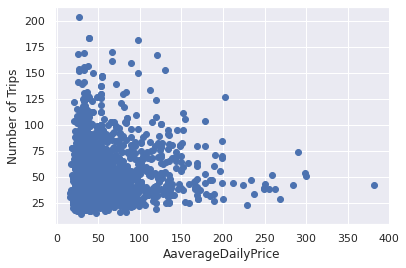

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

import statsmodels.formula.api as smf

plt.scatter(class1['averageDailyPrice'], class1['renterTripsTaken'])
plt.xlabel("AaverageDailyPrice")
plt.ylabel("Number of Trips")

In [ ]:
### Class 1
class1=Regress_X3[Regress_X3['Predict']==0]
class1.head()
X_1=class1.drop(['Predict'], axis=1)
X_1=X_1.rename(columns={'Listing Difference': 'ListingDifference'})
model2 = smf.ols('np.log(renterTripsTaken+1) ~ rating + reviewCount + responseRate + ListingDifference + population + listingmonth + num_neigh + np.log(averageDailyPrice)', data=X_1).fit()
print(model2.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(renterTripsTaken + 1)   R-squared:                       0.877
Model:                                      OLS   Adj. R-squared:                  0.876
Method:                           Least Squares   F-statistic:                     1889.
Date:                          Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                                  06:25:51   Log-Likelihood:                 996.27
No. Observations:                          2131   AIC:                            -1975.
Df Residuals:                              2122   BIC:                            -1924.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

In [ ]:
model2.params

Intercept                    3.864889e+00
rating                      -2.036495e-01
reviewCount                  1.859316e-02
responseRate                 1.810205e-03
ListingDifference            4.696661e-03
population                   8.081127e-10
listingmonth                -3.886084e-03
num_neigh                    2.332514e-05
np.log(averageDailyPrice)   -6.372783e-03
dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'log_Number of Trips')

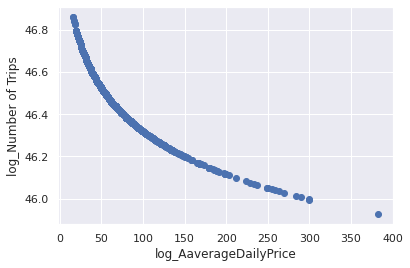

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

import statsmodels.formula.api as smf
class1['renterTripsTaken']= np.exp(model2.params[0] + model2.params[-1] * np.log(class1['averageDailyPrice']))
plt.scatter(class1['averageDailyPrice'], class1['renterTripsTaken'])
plt.xlabel("log_AaverageDailyPrice")
plt.ylabel("log_Number of Trips")

In [ ]:
### Class 2
class2=Regress_X3[Regress_X3['Predict']==1]

X_2=class2.drop(['Predict'], axis=1)
X_2=X_2.rename(columns={'Listing Difference': 'ListingDifference'})
model3 = smf.ols('np.log(renterTripsTaken+1) ~ rating + reviewCount + responseRate + ListingDifference + population + listingmonth + num_neigh + np.log(averageDailyPrice)', data=X_2).fit()
print(model3.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(renterTripsTaken + 1)   R-squared:                       0.849
Model:                                      OLS   Adj. R-squared:                  0.849
Method:                           Least Squares   F-statistic:                     2467.
Date:                          Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                                  06:30:01   Log-Likelihood:                -2727.2
No. Observations:                          3516   AIC:                             5472.
Df Residuals:                              3507   BIC:                             5528.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Number of Trips')

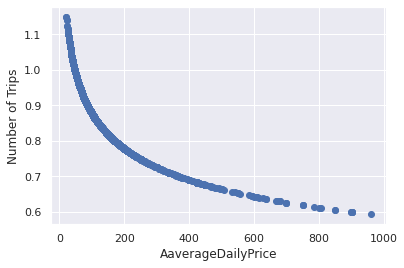

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

import statsmodels.formula.api as smf
class2['renterTripsTaken']= np.exp(model3.params[0] + model3.params[-1] * np.log(class2['averageDailyPrice']))
plt.scatter(class2['averageDailyPrice'], class2['renterTripsTaken'])
plt.xlabel("AaverageDailyPrice")
plt.ylabel("Number of Trips")

In [ ]:
### Class 3
class3=Regress_X3[Regress_X3['Predict']==2]

X_3=class3.drop(['Predict'], axis=1)
X_3=X_3.rename(columns={'Listing Difference': 'ListingDifference'})
model4 = smf.ols('np.log(renterTripsTaken+1) ~ rating + reviewCount + responseRate + ListingDifference + population + listingmonth + num_neigh + np.log(averageDailyPrice)', data=X_3).fit()
print(model4.summary())

                                 OLS Regression Results                                 
Dep. Variable:     np.log(renterTripsTaken + 1)   R-squared:                       0.867
Model:                                      OLS   Adj. R-squared:                  0.867
Method:                           Least Squares   F-statistic:                     5452.
Date:                          Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                                  06:30:06   Log-Likelihood:                -4199.1
No. Observations:                          6683   AIC:                             8416.
Df Residuals:                              6674   BIC:                             8477.
Df Model:                                     8                                         
Covariance Type:                      nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
----------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Number of Trips')

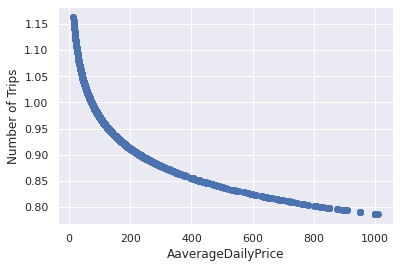

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

import statsmodels.formula.api as smf
class3['renterTripsTaken']= np.exp(model4.params[0] + model4.params[-1] * np.log(class3['averageDailyPrice']))
plt.scatter(class3['averageDailyPrice'], class3['renterTripsTaken'])
plt.xlabel("AaverageDailyPrice")
plt.ylabel("Number of Trips")

# Lili's code

In [ ]:
X=Turo.drop(['city','state','deliveryLabel','id', 'listingCreatedTime'], axis=1)

In [ ]:
X['Listing Difference']=X['listingyear']-X['year']

X.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,longitude,latitude,model,make,year,type,automaticTransmission,listingyear,population,Listing Difference
0,NaN,0,0,0.0,False,False,False,29,11,-93.265547,42.522726,Fusion,Ford,2014,car,True,2014,3109350,0
1,5.00,1,1,100.0,False,False,True,162,8,-95.789869,44.433663,718 Boxster,Porsche,2017,car,True,2018,5606249,1
2,NaN,0,0,NaN,False,False,True,40,5,-80.559747,40.351722,Cruze,Chevrolet,2014,car,True,2017,1817004,3
3,3.75,4,5,100.0,False,False,True,99,19,-80.222071,40.518838,6 Series,BMW,2006,car,True,2017,12787641,11
4,NaN,0,0,NaN,False,False,False,81,17,-80.241361,40.495285,Explorer,Ford,2017,suv,True,2018,12800922,1


In [ ]:
X['newListing'] = (np.where(X['newListing'] == True, 1,0 ))
X['freeDeliveryPromotion'] = (np.where(X['freeDeliveryPromotion'] == True, 1,0 ))
X['instantBookDisplayed'] = (np.where(X['instantBookDisplayed'] == True, 1,0 ))
X['automaticTransmission'] = (np.where(X['automaticTransmission'] == True, 1,0 ))

In [ ]:
X['responseRate'] = X['responseRate'].fillna(0)

In [ ]:
X['rating'].fillna((X['rating'].mean()), inplace=True)

In [ ]:
### encoding the data

In [ ]:
type_new = X['type'].astype('category')
type_new.head()

0    car
1    car
2    car
3    car
4    suv
Name: type, dtype: category
Categories (5, object): ['car', 'minivan', 'suv', 'truck', 'van']

In [ ]:
type_new=pd.DataFrame(type_new.cat.codes)
type_new=type_new.rename(columns={0: 'type_new'})
X1 = pd.concat([X,type_new],axis=1)

In [ ]:
model_new = X['model'].astype('category')
model_new.head()

0         Fusion
1    718 Boxster
2          Cruze
3       6 Series
4       Explorer
Name: model, dtype: category
Categories (837, object): ['1 Series', '1 Series M', '1001', '124 Spider', ..., 'wrangler ', 'xA', 'xB', 'xD']

In [ ]:
model_new=pd.DataFrame(model_new.cat.codes)
model_new=model_new.rename(columns={0: 'model_new'})
X1 = pd.concat([X1,model_new],axis=1)

In [ ]:
make_new = X['make'].astype('category')
make_new.head()

0         Ford
1      Porsche
2    Chevrolet
3          BMW
4         Ford
Name: make, dtype: category
Categories (58, object): ['AM General', 'Acura', 'Alfa Romeo', 'Aston Martin', ..., 'Volkswagen', 'Volvo', 'Yugo', 'smart']

In [ ]:
make_new=pd.DataFrame(make_new.cat.codes)
make_new=make_new.rename(columns={0: 'make_new'})
X1 = pd.concat([X1,make_new],axis=1)

In [ ]:
X2=X1.drop(['make','model','type','listingyear'], axis=1)

In [ ]:
X2

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,longitude,latitude,year,automaticTransmission,population,Listing Difference,type_new,model_new,make_new
0,4.873181,0,0,0.0,0,0,0,29,11,-93.265547,42.522726,2014,0,3109350,0,0,322,17
1,5.000000,1,1,100.0,0,0,0,162,8,-95.789869,44.433663,2017,0,5606249,1,0,59,44
2,4.873181,0,0,0.0,0,0,0,40,5,-80.559747,40.351722,2014,0,1817004,3,0,221,9
3,3.750000,4,5,100.0,0,0,0,99,19,-80.222071,40.518838,2006,0,12787641,11,0,55,5
4,4.873181,0,0,0.0,0,0,0,81,17,-80.241361,40.495285,2017,0,12800922,1,2,282,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36274,4.873181,0,0,0.0,0,0,0,84,13,-122.482675,48.791446,2007,0,7423362,10,2,273,8
36275,4.873181,0,0,0.0,0,0,0,126,14,-122.750321,48.995455,2007,0,7523869,11,2,574,4
36276,3.666700,4,5,88.0,0,0,0,47,18,-122.487011,48.720402,2007,0,7523869,11,3,672,18
36277,4.873181,0,0,0.0,0,0,0,170,20,-121.011510,39.217987,2017,0,39461588,1,0,114,50


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X2)

In [ ]:
kmeans = KMeans(
init="random",
n_clusters=3,
n_init=10,
max_iter=300,
random_state=42
 )

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, random_state=42)

In [ ]:
kmeans.cluster_centers_

array([[-0.04857253,  2.78203514,  2.80786057,  0.60822381,  0.        ,
         0.        ,  0.        , -0.35778554, -0.36104856, -0.17643202,
         0.0198574 , -0.10447218,  0.        ,  0.18636147, -0.07304545,
        -0.18867322,  0.01674876,  0.19911109],
       [ 0.01467   , -0.24478717, -0.24410918, -0.07427091,  0.        ,
         0.        ,  0.        ,  0.0310445 ,  0.30678387,  0.42968639,
         0.65953194, -0.14041634,  0.        , -0.8377951 ,  0.15733557,
         0.05198186,  0.00900349, -0.02786519],
       [-0.00611011, -0.22942812, -0.23442863, -0.02996441,  0.        ,
         0.        ,  0.        ,  0.02993051, -0.23782338, -0.38844199,
        -0.64508126,  0.15418915,  0.        ,  0.78387455, -0.14081433,
        -0.01886707, -0.01157584, -0.00635357]])

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"max_iter": 300,
"random_state": 42,
 }

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
   kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
   kmeans.fit(scaled_features)
   sse.append(kmeans.inertia_)

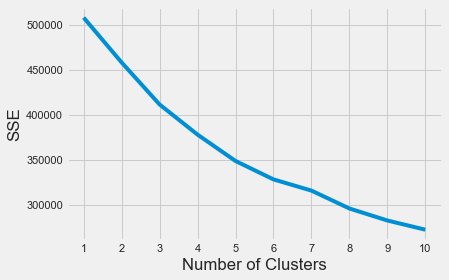

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
   range(1, 11), sse, curve="convex", direction="decreasing"
   )
kl.elbow

5

In [ ]:
kmeans = KMeans(n_clusters=5)
y_kmeans = kmeans.fit_predict(scaled_features)

In [ ]:
kmeans.cluster_centers_

array([[ 2.42294315e-02, -1.10462092e-01, -9.56646460e-02,
         5.74404241e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -1.52392605e-01,  2.36609196e-01,
         3.69862222e-01,  7.30445724e-01, -1.37777942e-02,
         0.00000000e+00, -8.63829361e-01,  3.84803505e-02,
         3.85100105e-02,  3.52440876e-02,  3.12537920e-02],
       [ 8.15059548e-02, -3.97325608e-01, -4.18408395e-01,
        -4.88719729e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  9.17105062e-01,  1.29444490e-01,
        -1.09390714e-01,  1.78105605e-01, -7.82317576e+00,
         0.00000000e+00, -8.75103026e-02,  7.88467990e+00,
        -6.38498825e-01, -4.02339720e-02,  3.52586547e-02],
       [-8.00354925e-03, -4.82761374e-01, -5.09322617e-01,
        -1.61099875e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  3.95469136e-01,  1.73815339e-01,
         2.01288399e-01, -7.37353301e-02,  8.42654714e-02,
         0.00000000e+00, -1.52658110e-02, -1.02880024e

In [ ]:
result=pd.DataFrame(y_kmeans)
result=result.rename(columns={0: 'Predict'})
X3 = pd.concat([X2,result],axis=1)

In [ ]:
centers=pd.DataFrame(kmeans.cluster_centers_)
names=X3.iloc[:,0:18].columns
result=result.rename(columns={0: 'Predict'})

In [ ]:
centers.columns = names

In [ ]:
centers ## five centers
# drop renterTripsTaken, responserate, newListing, freeDeliveryPromotion, 
# instantBookDisplayed, longitude, latitude, year, population, model,
# replace make with level

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,longitude,latitude,year,automaticTransmission,population,Listing Difference,type_new,model_new,make_new
0,0.024229,-0.110462,-0.095665,0.574404,0.0,0.0,0.0,-0.152393,0.236609,0.369862,0.730446,-0.013778,0.0,-0.863829,0.038480,0.038510,0.035244,0.031254
1,0.081506,-0.397326,-0.418408,-0.488720,0.0,0.0,0.0,0.917105,0.129444,-0.109391,0.178106,-7.823176,0.0,-0.087510,7.884680,-0.638499,-0.040234,0.035259
2,-0.008004,-0.482761,-0.509323,-1.610999,0.0,0.0,0.0,0.395469,0.173815,0.201288,-0.073735,0.084265,0.0,-0.015266,-0.102880,0.025643,-0.083746,-0.116923
3,-0.008218,-0.103177,-0.099117,0.577955,0.0,0.0,0.0,-0.111233,-0.284014,-0.465241,-0.642943,0.156524,0.0,0.790633,-0.130383,-0.003731,0.027533,0.020979
4,-0.055513,3.059804,3.073683,0.607874,0.0,0.0,0.0,-0.353899,-0.395463,-0.187045,0.014507,-0.096569,0.0,0.216915,-0.096220,-0.192677,0.019929,0.196559


In [ ]:
### Regression
### Y = number of trips
### X = everything + the number of available cars in the neighbourhood + listingmonth

In [ ]:
class1= X3 [X3['Predict']==0]
class1.head()

,rating,renterTripsTaken,reviewCount,responseRate,newListing,freeDeliveryPromotion,instantBookDisplayed,averageDailyPrice,scalar,longitude,latitude,year,automaticTransmission,population,Listing Difference,type_new,model_new,make_new,Predict
1,5.000000,1,1,100.0,0,0,0,162,8,-95.789869,44.433663,2017,0,5606249,1,0,59,44,0
3,3.750000,4,5,100.0,0,0,0,99,19,-80.222071,40.518838,2006,0,12787641,11,0,55,5,0
6,4.873181,0,0,100.0,0,0,0,38,19,-79.163175,35.023204,2016,0,10381615,2,2,423,12,0
7,5.000000,1,1,100.0,0,0,0,28,19,-79.161022,35.023165,2012,0,10381615,6,0,187,22,0
8,5.000000,5,5,100.0,0,0,0,64,20,-79.162499,35.211684,2011,0,10381615,7,2,574,4,0


In [ ]:
X_1=class1.drop(['averageDailyPrice','Predict','renterTripsTaken'], axis=1)
ln_averageDailyPrice = class1['averageDailyPrice'].values.reshape(-1,1)
X_1['averageDailyPrice']=ln_averageDailyPrice

In [ ]:
#Y_1=pd.DataFrame(class1['averageDailyPrice'])
y_log = class1['renterTripsTaken'].values.reshape(-1,1)

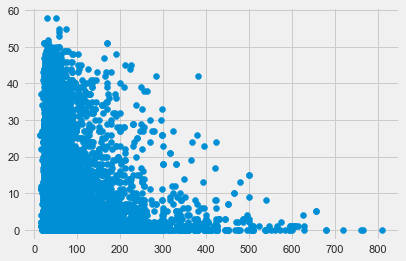

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(ln_averageDailyPrice, y_log)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_1, y_log, test_size = 0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
pd.DataFrame(model.coef_.tolist()[0], x_train.columns,columns = ['Coeff'])
### The coeff is the elasticity 

,Coeff
rating,-1.253334e-01
reviewCount,1.142363e+00
responseRate,-4.278142e-04
newListing,-4.996004e-16
freeDeliveryPromotion,5.551115e-17
instantBookDisplayed,-4.440892e-16
scalar,-9.512663e-03
longitude,-5.343053e-03
latitude,7.884765e-03
year,-4.944330e-01


In [ ]:
class1['averageDailyPrice'].mean()

81.36739555858078